In [37]:
# Importing required libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
import tensorflow as tf


# Labels
HEALTHY = 0

# Constants
tf.random.set_seed(0)
np.random.seed(0)

In [38]:
def read_image(file_path):
    with Image.open(file_path) as image:
        return np.array(image)

image_path = 'test.JPG'
image_data = read_image(image_path)

print('Image Shape: {} \nRows: {}, \nColumns: {}, \nRGB values: {}'.format(image_data.shape, *image_data.shape))

normalize = Normalizer()

Image Shape: (256, 256, 3) 
Rows: 256, 
Columns: 256, 
RGB values: 3


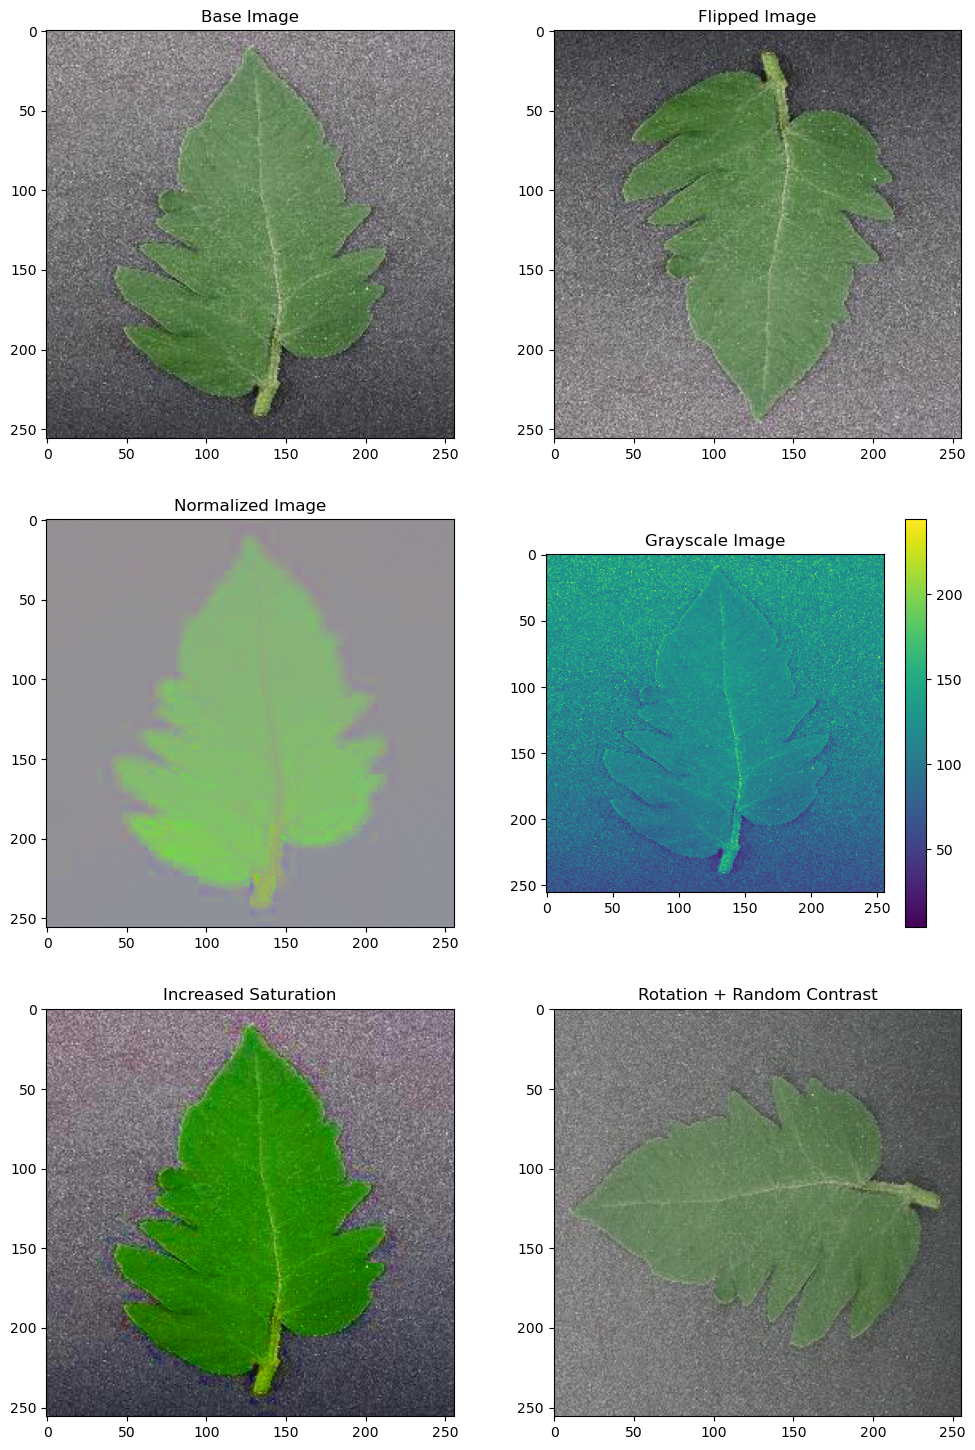

In [39]:
plt.figure(figsize=(12, 18))

# Base Image
plt.subplot(3, 2, 1)
plt.title('Base Image')
plt.imshow(image_data)

# Data augmentation by flipping the image
plt.subplot(3, 2, 2)
plt.title('Flipped Image')
plt.imshow(tf.image.flip_up_down(image_data))

# Data augmentation by normalizing the image
# Reshape image data to 2D array
pixels = image_data.reshape(-1, 3)
# Scale pixel values
normalized_image_data = normalize.fit_transform(pixels).reshape(image_data.shape)
# Display the image
plt.subplot(3, 2, 3)
plt.title('Normalized Image')
plt.imshow(normalized_image_data)

# Data augmentation by increasing saturation
plt.subplot(3, 2, 5)
plt.title('Increased Saturation')
plt.imshow(tf.image.adjust_saturation(image_data, 3))

# Data augmentation by grayscale
plt.subplot(3, 2, 4)
plt.title('Grayscale Image')
plt.imshow(tf.image.rgb_to_grayscale(image_data))
plt.colorbar()

# Data augmentation by rotating and randomly adjusting contrast
plt.subplot(3, 2, 6)
plt.title('Rotation + Random Contrast')
plt.imshow(tf.image.stateless_random_contrast(tf.image.rot90(image_data), lower=0.2, upper=0.8, seed=(1, 2)))